### Import and warehouse data:

#### Import all the given datasets and explore shape and size of each.  

In [171]:
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# matplotlib.pyplot plots data
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [172]:
data1 = pd.read_csv('Part2 - Data1.csv')
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [173]:
data1.shape # Check number of columns and rows in data frame

(5000, 8)

In [125]:
data2 = pd.read_csv('Part2 -Data2.csv')
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [126]:
data2.shape # Check number of columns and rows in data frame

(5000, 7)

#### Merge all datasets onto one and explore final shape and size. 

In [127]:
from functools import reduce
data_frames = [data1,data2]
data = reduce(lambda  left,right: pd.merge(left,right,on='ID',how='outer'), data_frames)
data.shape

(5000, 14)

In [128]:
# Top 10 rows of the dataset
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


### Data cleansing:

#### Explore and if required correct the datatypes of each attribute

In [129]:
#describe dataset
data.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [130]:
#checking info to see if there are any null values and what is the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


#### Explore for null values in the attributes and if required drop or impute values.  

In [131]:
data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [132]:
data.nunique()

ID                     5000
Age                      45
CustomerSince            47
HighestSpend            162
ZipCode                 467
HiddenScore               4
MonthlyAverageSpend     108
Level                     3
Mortgage                347
Security                  2
FixedDepositAccount       2
InternetBanking           2
CreditCard                2
LoanOnCard                2
dtype: int64

In [133]:
for values in data.columns[9:]:
    print(data[values].value_counts())

0    4478
1     522
Name: Security, dtype: int64
0    4698
1     302
Name: FixedDepositAccount, dtype: int64
1    2984
0    2016
Name: InternetBanking, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [134]:
data.HiddenScore.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64

In [135]:
data.Level.value_counts()

1    2096
3    1501
2    1403
Name: Level, dtype: int64

### Data analysis & visualisation: 

#### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.  

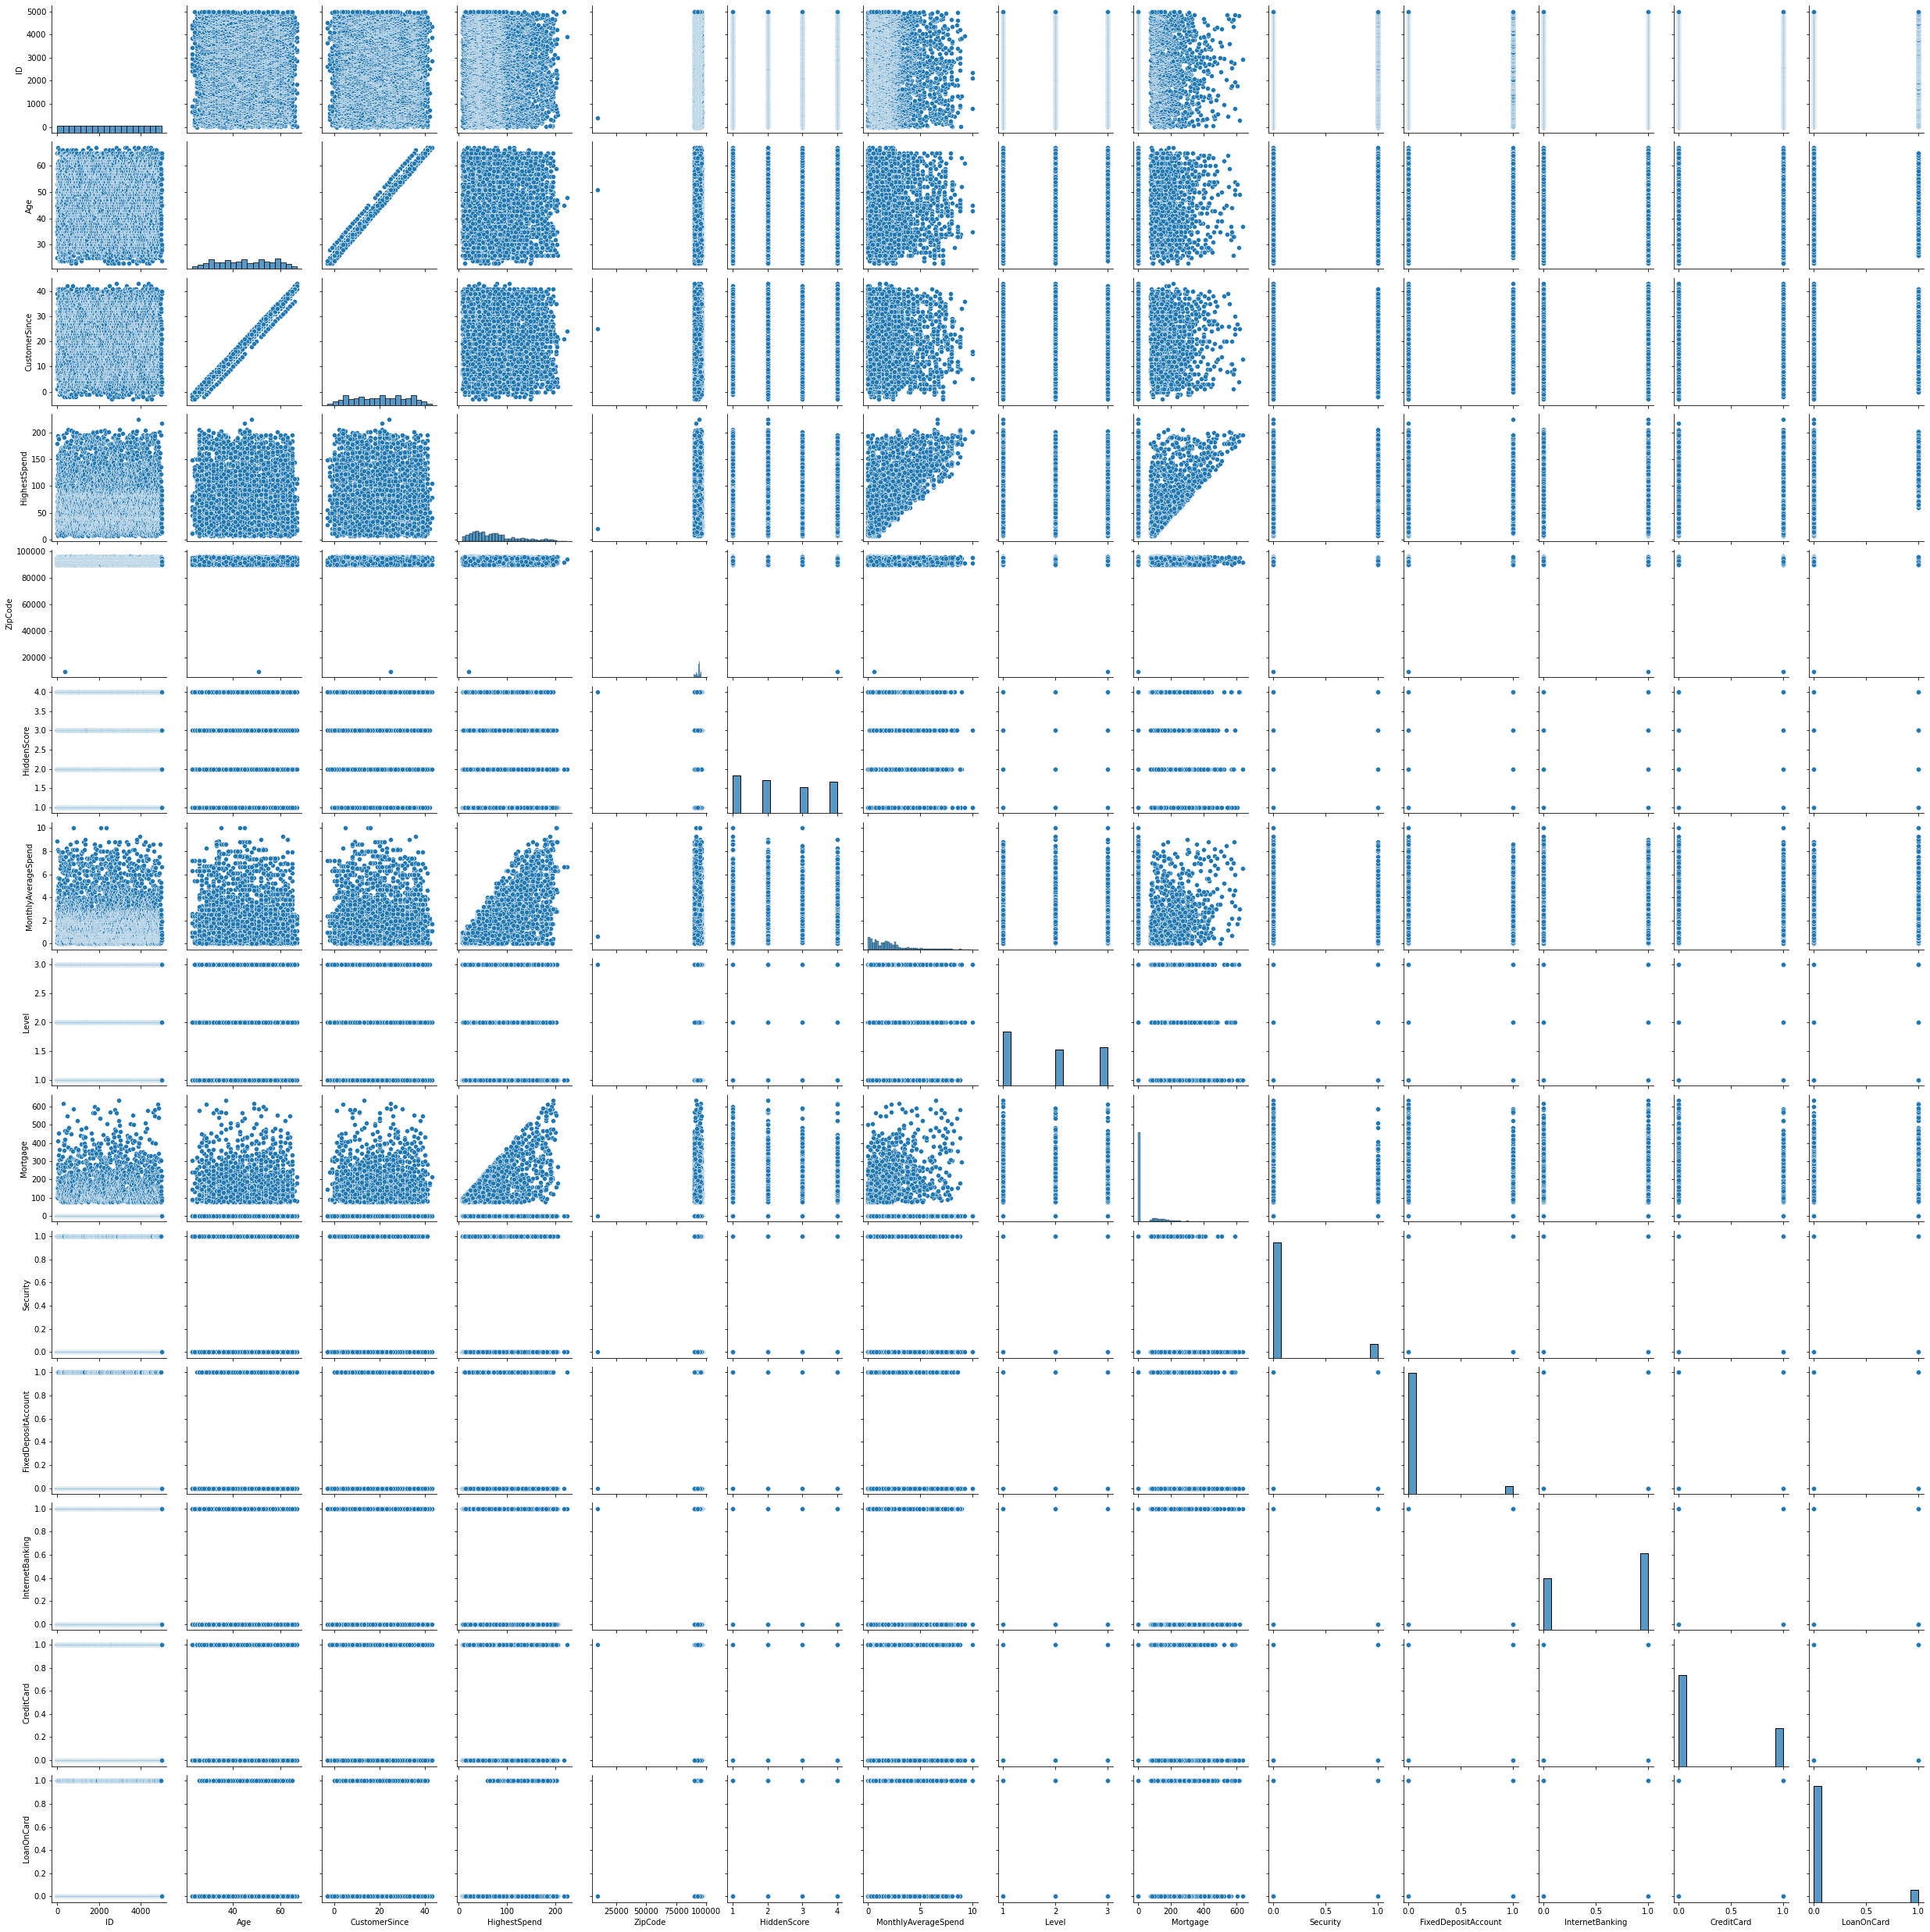

In [136]:
sns.pairplot(data)

In [137]:
#describe dataset
data.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [138]:
data = data.dropna()
#describe dataset
data.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,2.395582,1.939536,1.880924,56.589759,0.104418,0.060643,0.597189,0.294378,0.096386
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.147200,1.750006,0.840144,101.836758,0.305832,0.238697,0.490513,0.455808,0.295149
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,3.000000,2.525000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


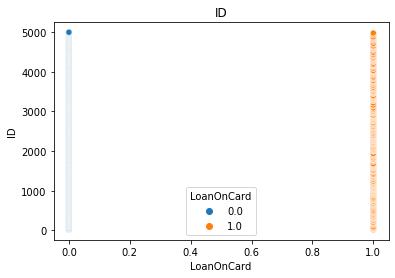

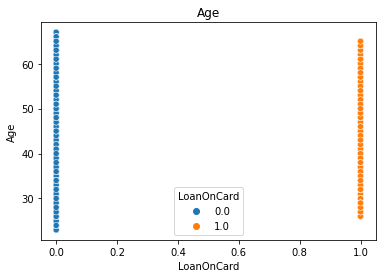

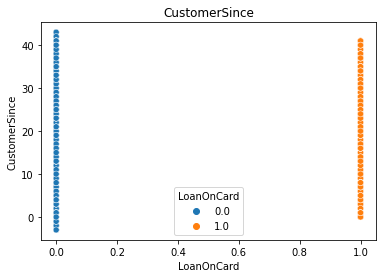

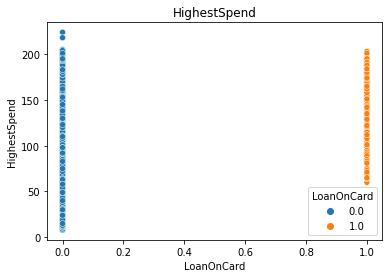

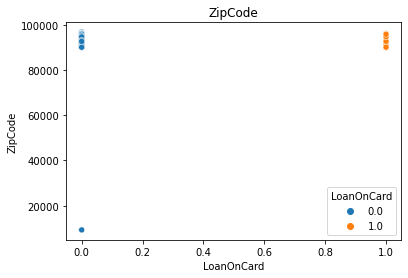

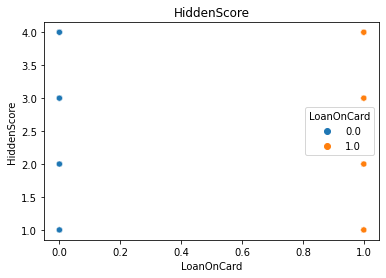

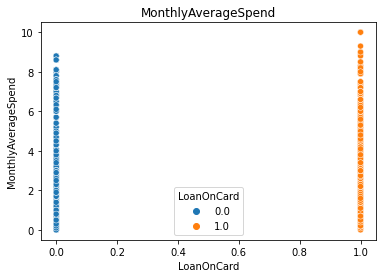

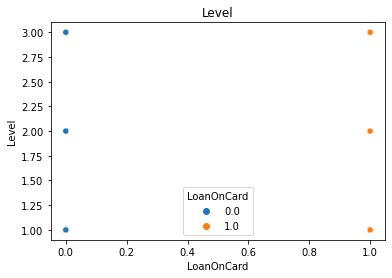

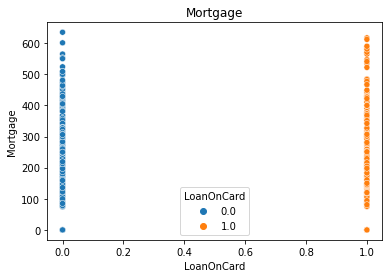

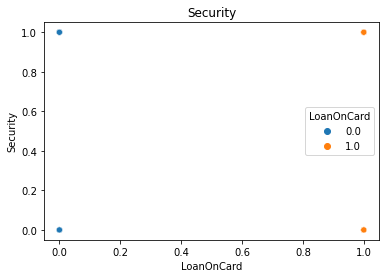

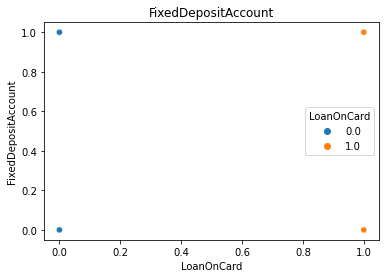

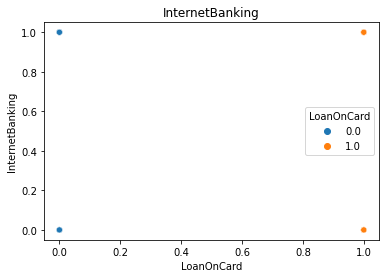

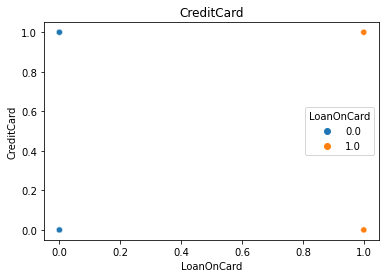

In [139]:
for values in data.columns[:-1]:
    sns.scatterplot(x = data['LoanOnCard'],y = data[values],hue=data['LoanOnCard'])
    plt.title(values)
    plt.show()

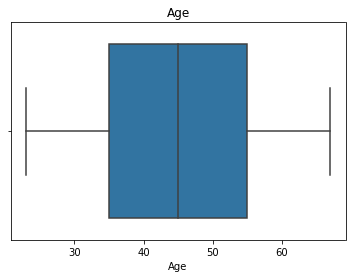

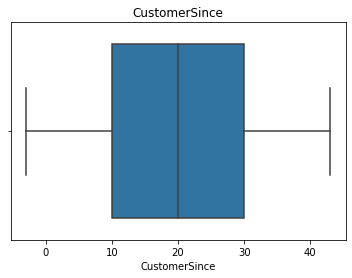

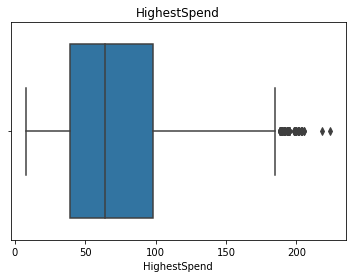

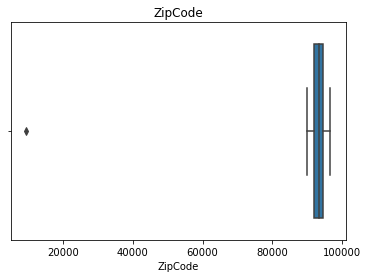

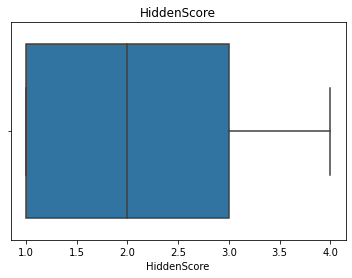

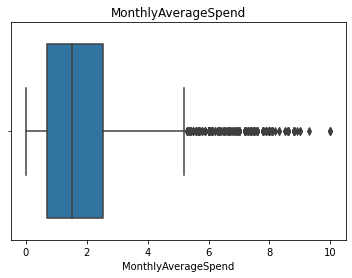

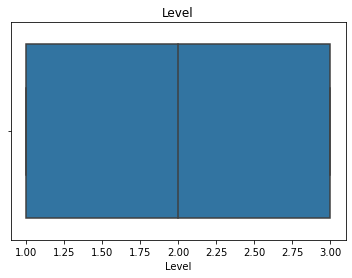

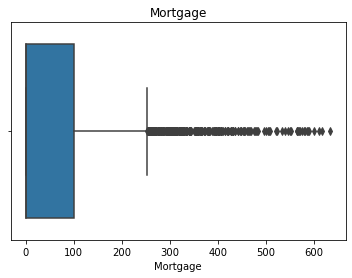

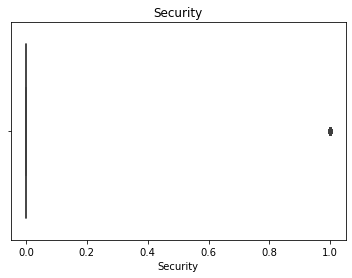

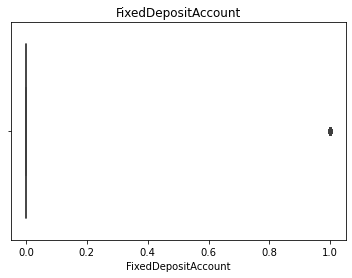

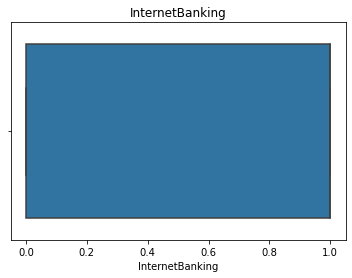

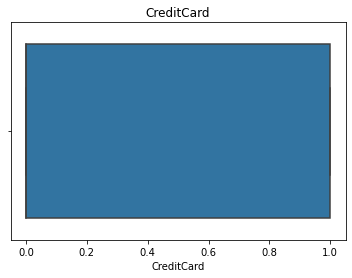

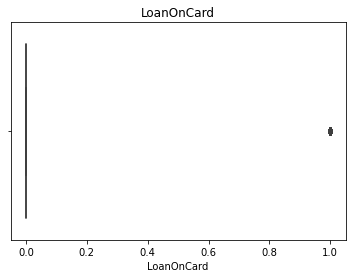

In [140]:
for values in data.columns[1:]:
    sns.boxplot(data[values])
    plt.title(values)
    plt.show()

In [141]:
#Removing outliers using IQR
for values in ['HighestSpend', 'MonthlyAverageSpend', 'Mortgage']:
    
    q1 = np.percentile( data[values], 25, interpolation = 'midpoint')
    q3 = np.percentile( data[values], 75, interpolation = 'midpoint')
    
    iqr= q3-q1
    
    data.drop(data[(data[values]>=(q3+1.5*iqr))|(data[values]<=(q3-1.5*iqr))].index,inplace=True)

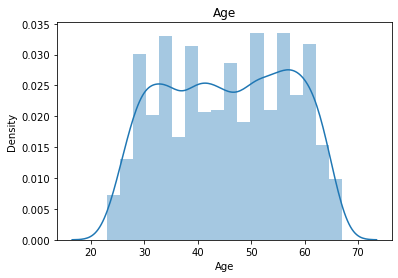

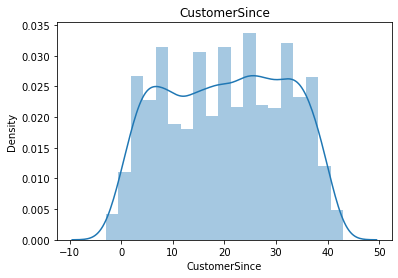

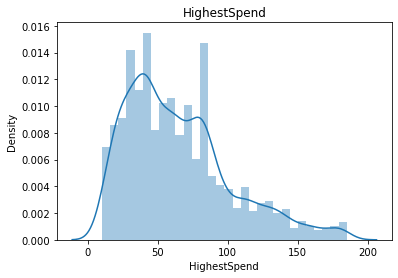

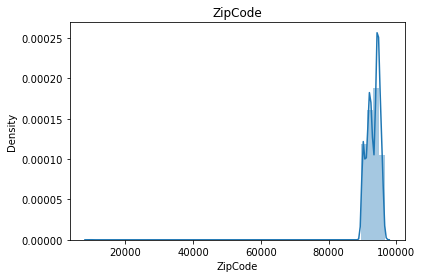

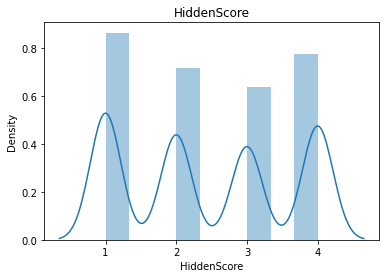

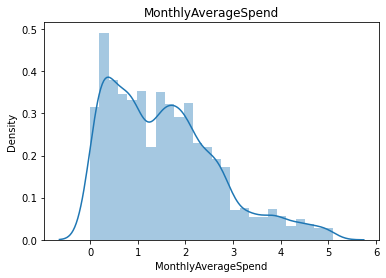

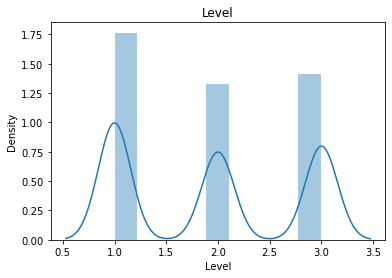

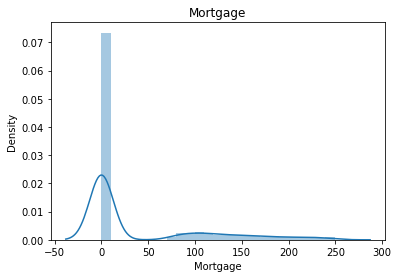

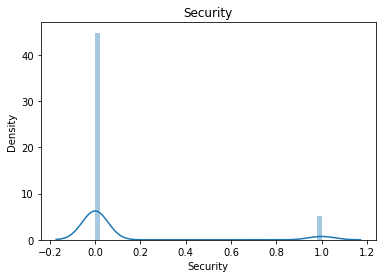

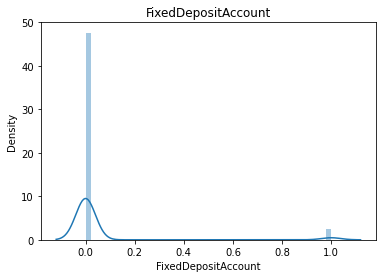

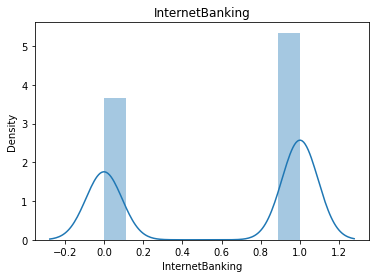

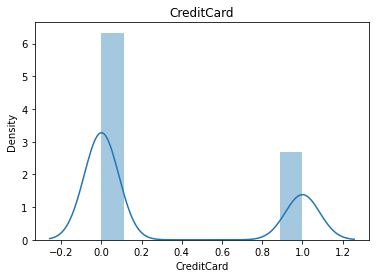

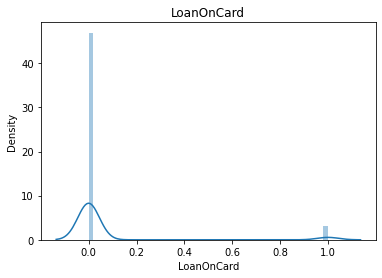

In [142]:
for values in data.columns[1:]:
    sns.distplot(data[values])
    plt.title(values)
    plt.show()

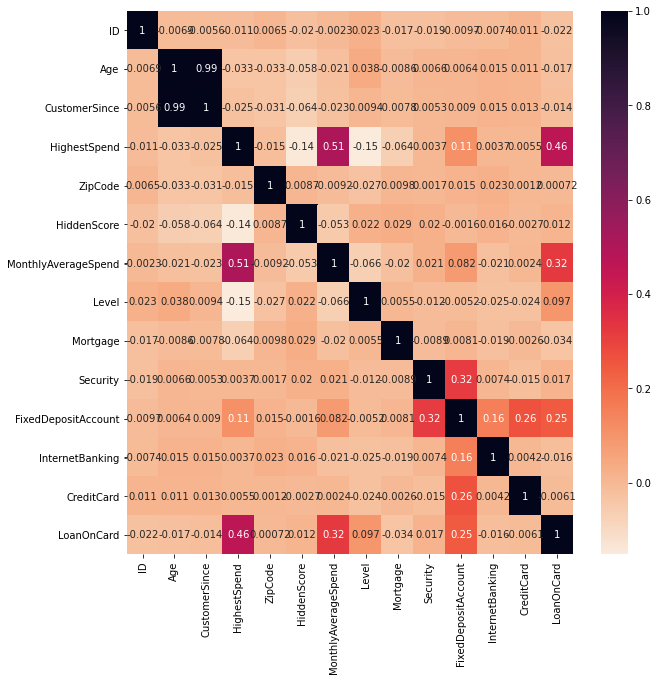

In [143]:
data_corr = data.corr()

# displaying heatmap
%matplotlib inline
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(data_corr,
                       cmap="rocket_r",
                       annot=True)

plt.show()

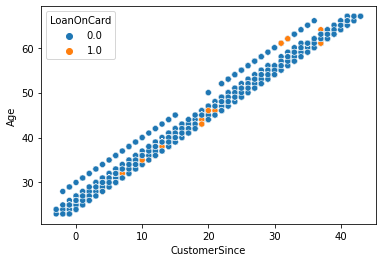

In [144]:
sns.scatterplot(y=data['Age'],x=data['CustomerSince'],hue=data['LoanOnCard']);

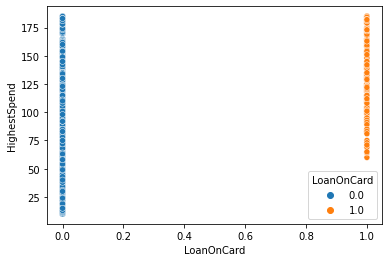

In [145]:
sns.scatterplot(y=data['HighestSpend'],x=data['LoanOnCard'],hue=data['LoanOnCard']);

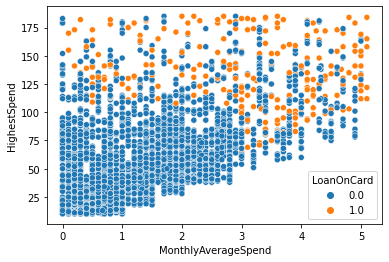

In [146]:
sns.scatterplot(y=data['HighestSpend'],x=data['MonthlyAverageSpend'],hue=data['LoanOnCard']);

### Model training, testing and tuning: 

#### Design and train a Logistic regression and Naive Bayes classifiers.

In [147]:
x = data.drop(columns='LoanOnCard')
y = data['LoanOnCard']

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [150]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

#identifying intercept
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.011328 -0.653136  0.668585  2.286413  0.097965  0.685172  0.556322   

          7         8         9       10        11        12  intercept  
0  1.092403 -0.049112 -0.228157  0.62699 -0.310436 -0.419951  -5.274162  


#### Design and train a Logistic regression and Naive Bayes classifiers.

In [151]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9713622291021672


In [152]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model = GaussianNB()

model.fit(x_train, y_train.ravel())

GaussianNB()

In [153]:
data_train_predict = model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, data_train_predict)))

Model Accuracy: 0.9194


#### Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with  your comments for selecting this model. 

Minimum error:- 0.034055727554179564 at K = 4


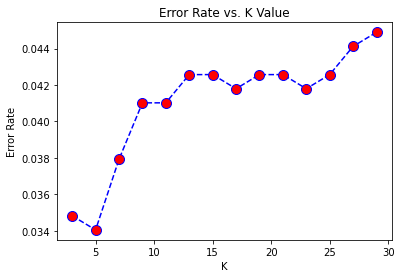

In [154]:
# Finding K through Iteration
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(3,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    error.append(np.mean(preds != np.array(y_test)))

plt.plot(range(3,30,2),error,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+3)

In [155]:
error

[0.0348297213622291,
 0.034055727554179564,
 0.037925696594427245,
 0.04102167182662539,
 0.04102167182662539,
 0.04256965944272446,
 0.04256965944272446,
 0.04179566563467492,
 0.04256965944272446,
 0.04256965944272446,
 0.04179566563467492,
 0.04256965944272446,
 0.04411764705882353,
 0.04489164086687306]

In [162]:
from sklearn.neighbors import KNeighborsClassifier
k = 4  
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(x_train, y_train)

#Predict the results
y_pred = classifier.predict(x_test)

In [163]:
#Confusion Matrix to check the accuracy score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels =['Pr 0', 'Pr 1']
print(*labels)
for line in cm:
    print(*line)

Pr 0 Pr 1
1216 1
52 23


In [164]:
#### Lets take a look at the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1217
         1.0       0.96      0.31      0.46        75

    accuracy                           0.96      1292
   macro avg       0.96      0.65      0.72      1292
weighted avg       0.96      0.96      0.95      1292



In [168]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(x_train , y_train)

SVC(C=3, gamma=0.025)

In [169]:
y_pred = clf.predict(x_test)

In [170]:
clf.score(x_test , y_test)

0.9760061919504643

### Conclusion

In [ ]:
Based on accuracy of various models looks below:
    KNN - 96%
    naive_bayes - 92%
    svm - 97.6%
    LogisticRegression - 97.1%
    
The SVM has the highest accuracy compared to the other models. So this is the best fit for this dataset.

End